<a href="https://colab.research.google.com/github/varunkr24/AIML/blob/Python/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import h5py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [3]:
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = "/content/drive/MyDrive/AIML/Projects/NN Project/NN Project/Autonomous_Vehicles_SVHN_single_grey1.h5"

In [6]:
f = h5py.File(path, 'r')

In [7]:
list(f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [8]:
f['X_test'].shape

(18000, 32, 32)

In [9]:
f['X_train'].shape

(42000, 32, 32)

Label: 7


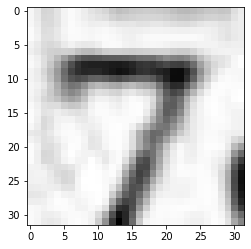

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(f['y_train'][8000]))
plt.imshow(f['X_train'][8000], cmap='gray')

In [11]:
print(f['X_train'].shape)
print(f['y_train'].shape)
print(f['X_test'].shape)
print(f['y_test'].shape)
print(f['X_val'].shape)
print(f['y_val'].shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)
(60000, 32, 32)
(60000,)


In [12]:
x_train = f['X_val'].value.reshape(f['X_val'].shape[0], 32, 32,1)
x_val = f['X_train'].value.reshape(f['X_train'].shape[0], 32, 32,1)
x_test = f['X_test'].value.reshape(f['X_test'].shape[0], 32, 32,1)

In [13]:
y_train = f['y_val']
y_val = f['y_train']
y_test = f['y_test']

In [14]:
x_train.shape

(60000, 32, 32, 1)

In [15]:
x_train = x_train.astype('float32')/255
x_val = x_val.astype('float32')/255
x_test = x_test.astype('float32')/255

In [16]:
print("x_train shape:", x_train.shape)
print("Images in x_train:", x_train.shape[0])
print("Images in x_test:", x_test.shape[0])
print("Max value in x_train:", x_test.max())
print("Min value in x_train:", x_test.min())
print("Max value in x_test:", x_test.max())
print("Min value in x_test:", x_test.min())

x_train shape: (60000, 32, 32, 1)
Images in x_train: 60000
Images in x_test: 18000
Max value in x_train: 0.9999
Min value in x_train: 0.0
Max value in x_test: 0.9999
Min value in x_test: 0.0


In [17]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [18]:
print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (60000, 10)
One value of y_train: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [20]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model.fit(x=x_train, y=y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
1875/1875 [==============================] - 9s 3ms/step - loss: 2.2968 - accuracy: 0.1368 - val_loss: 2.1648 - val_accuracy: 0.2732
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0834 - accuracy: 0.3465 - val_loss: 1.8291 - val_accuracy: 0.4596
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7403 - accuracy: 0.5125 - val_loss: 1.5181 - val_accuracy: 0.5959
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4781 - accuracy: 0.5953 - val_loss: 1.3381 - val_accuracy: 0.6307
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2943 - accuracy: 0.6401 - val_loss: 1.2067 - val_accuracy: 0.6677
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1920 - accuracy: 0.6640 - val_loss: 1.1404 - val_accuracy: 0.6753
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1258 - accuracy: 0.6769 - val_loss: 1.0815 - val_accuracy:

In [21]:
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(128, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(10, activation="softmax"))

# Compile the model
model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model1.fit(x=x_train, y=y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2842 - accuracy: 0.1426 - val_loss: 2.0725 - val_accuracy: 0.3021
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9130 - accuracy: 0.3633 - val_loss: 1.5526 - val_accuracy: 0.4868
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4603 - accuracy: 0.5302 - val_loss: 1.2409 - val_accuracy: 0.6120
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2277 - accuracy: 0.6119 - val_loss: 1.1336 - val_accuracy: 0.6452
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1150 - accuracy: 0.6518 - val_loss: 1.0000 - val_accuracy: 0.6950
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0357 - accuracy: 0.6800 - val_loss: 0.9705 - val_accuracy: 0.6970
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9748 - accuracy: 0.6981 - val_loss: 0.8925 - val_ac

In [22]:
model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(256, activation="relu"))
model2.add(Dense(256, activation="relu"))
model2.add(Dense(256, activation="relu"))
model2.add(Dense(10, activation="softmax"))

# Compile the model
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model2.fit(x=x_train, y=y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2867 - accuracy: 0.1441 - val_loss: 2.1567 - val_accuracy: 0.2550
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9818 - accuracy: 0.3627 - val_loss: 1.4888 - val_accuracy: 0.5354
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4260 - accuracy: 0.5524 - val_loss: 1.3861 - val_accuracy: 0.5475
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1855 - accuracy: 0.6306 - val_loss: 1.0648 - val_accuracy: 0.6688
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0523 - accuracy: 0.6729 - val_loss: 0.9397 - val_accuracy: 0.7145
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9756 - accuracy: 0.6988 - val_loss: 0.9238 - val_accuracy: 0.7103
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9082 - accuracy: 0.7205 - val_loss: 0.9463 - val_ac

In [26]:
model3 = Sequential()
model3.add(Flatten())
model3.add(Dense(256, activation="relu"))
model3.add(Dense(256, activation="relu"))
model3.add(Dense(256, activation="relu"))
model3.add(Dense(256, activation="relu"))
model3.add(Dense(10, activation="softmax"))

# Compile the model
model3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model_3 = model3.fit(x=x_train, y=y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2816 - accuracy: 0.1461 - val_loss: 2.0468 - val_accuracy: 0.3100
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 1.8754 - accuracy: 0.3567 - val_loss: 1.4641 - val_accuracy: 0.5195
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3897 - accuracy: 0.5476 - val_loss: 1.1610 - val_accuracy: 0.6291
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1709 - accuracy: 0.6272 - val_loss: 1.1356 - val_accuracy: 0.6322
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0404 - accuracy: 0.6749 - val_loss: 0.9384 - val_accuracy: 0.7107
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9561 - accuracy: 0.7013 - val_loss: 0.9687 - val_accuracy: 0.6890
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8806 - accuracy: 0.7258 - val_loss: 0.8621 - val_ac

In [28]:
model3.summary()
#!mkdir -p saved_model
#model.save('saved_model/my_model')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_18 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                2570      
Total params: 462,346
Trainable params: 462,346
Non-trainable params: 0
________________________________________________

<class 'tensorflow.python.keras.callbacks.History'>


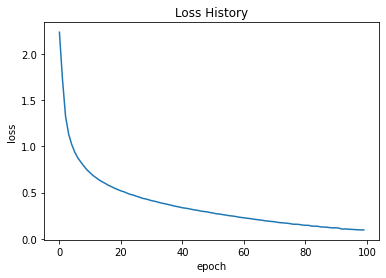

<class 'tensorflow.python.keras.callbacks.History'>


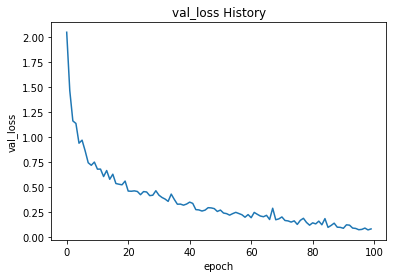

In [32]:
def plot_loss(hist):
  # plot the loss
  plt.title('Loss History')
  plt.plot(hist.history['loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.show()

print(type(model_3))
plot_loss(model_3) 

def plot_loss(hist):
  # plot the val_loss
  plt.title('val_loss History')
  plt.plot(hist.history['val_loss'])
  plt.ylabel('val_loss')
  plt.xlabel('epoch')
  plt.show()

print(type(model_3))
plot_loss(model_3) 

<class 'tensorflow.python.keras.callbacks.History'>


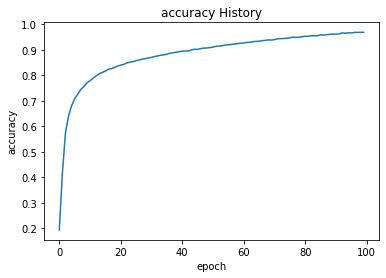

<class 'tensorflow.python.keras.callbacks.History'>


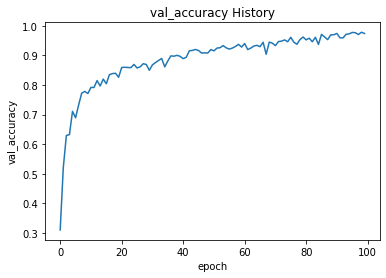

In [33]:
def plot_loss(hist):
  # plot the accuracy
  plt.title('accuracy History')
  plt.plot(hist.history['accuracy'])
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.show()

print(type(model_3))
plot_loss(model_3)

def plot_loss(hist):
  # plot the val_accuracy
  plt.title('val_accuracy History')
  plt.plot(hist.history['val_accuracy'])
  plt.ylabel('val_accuracy')
  plt.xlabel('epoch')
  plt.show()

print(type(model_3))
plot_loss(model_3) 

In [26]:
def create_model(lr, Lambda):

    ## hyperparameters
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10
        
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=lr, decay=1e-7, momentum=0.9)
    # Compile model
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"],optimizer="sgd")
    return model

In [27]:
model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=10)

In [28]:
# define the grid search parameters
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import regularizers, optimizers
lr = [1e-1] #1e-5,1e-4,1e-3,1e-2,
Lambda = [1e-5]#1e-6,1e-4,1e-3

param_grid = dict(lr=lr,Lambda=Lambda)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Epoch 1/30
3000/3000 [==============================] - 5s 2ms/step - loss: 2.3383 - accuracy: 0.1993
Epoch 2/30
3000/3000 [==============================] - 5s 2ms/step - loss: 2.1536 - accuracy: 0.1984
Epoch 3/30
3000/3000 [==============================] - 5s 2ms/step - loss: 2.1368 - accuracy: 0.2014
Epoch 4/30
3000/3000 [==============================] - 5s 2ms/step - loss: 2.1699 - accuracy: 0.2019
Epoch 5/30
3000/3000 [==============================] - 5s 2ms/step - loss: 2.1300 - accuracy: 0.1977
Epoch 6/30
3000/3000 [==============================] - 5s 2ms/step - loss: 2.1500 - accuracy: 0.2071
Epoch 7/30
3000/3000 [==============================] - 5s 2ms/step - loss: 2.1349 - accuracy: 0.2046
Epoch 8/30
3000/3000 [==============================] - 5s 2ms/step - loss: 2.1513 - accuracy: 0.1998
Epoch 9/30
3000/3000 [==============================] - 5s 2ms/step - loss: 2.1016 - accuracy: 0.1983
Epoch 10/30
3000/3000 [==============================] - 5s 2ms/step - loss: 2.110